Packages

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from SINDyFunctions import *

Simulate Lorenz system and add noise

In [2]:
# system parameters
sigma = 10
rho = 28
beta = 8/3

# true coefficient matrix (with 1, linear, and quadratic basis functions)
w_true = np.zeros((10,3))
w_true[1,0] = -sigma
w_true[2,0] = sigma
w_true[1,1] = rho
w_true[2,1] = -1
w_true[9,1] = -1
w_true[3,2] = -beta
w_true[7,2] = 1

# simulate
X0 = np.array([20,12,-30])  # initial conditions
t_sim = 10
gridDensity = 1000  # number of steps in one second
[t_out,X_clean,X_dot_out] = simulateLorenzSystem(X0,t_sim,gridDensity,sigma,rho,beta)

# add noise
MD = t_sim*gridDensity
arr_sig_NR = np.logspace(-6,-1,6)   # array of noise ratios
N_noise = 200   # number of noises to try at each noise level
arr_X_noisy = np.zeros((X_clean.shape[0],X_clean.shape[1],len(arr_sig_NR),N_noise)) # allocte a 4-way array for storing noisy trajectory data

rng = np.random.default_rng(seed=0)
for i in range(0,len(arr_sig_NR)):
    sig_NR = arr_sig_NR[i]
    sig = sig_NR*np.linalg.norm(X_clean,"fro")/np.sqrt(MD)
    for j in range(0,N_noise):
        X_noisy = X_clean+rng.normal(0,sig,size=X_clean.shape)
        arr_X_noisy[:,:,i,j] = X_noisy

Regular SINDy

In [3]:
# sparse regression settings
params_regression = dict()
params_regression['method'] = 'ridge'
params_regression['lambda_sparse'] = 0.5
params_regression['lambda_ridge'] = 0.001
params_regression['N_loops'] = 100

# evaluate error at different noise levels
arr_relError_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean relative error norms for each noise level
arr_TPR_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean TPR for each noise level
for i in range(0,len(arr_sig_NR)):
    arr_relError = np.zeros((1,N_noise))   # array of relative error norms for N noises with current noise level
    arr_TPR = np.zeros((1,N_noise)) # array of TPRs for N noises with current noise level
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = SINDy_Lorenz(t_out,X_noisy,params_regression)
        errorNorm_rel,TPR = errorEval(w_true,w_ident)
        arr_relError[0,j] = errorNorm_rel
        arr_TPR[0,j] = TPR
    arr_relError_mean[0,i] = np.average(arr_relError)
    arr_TPR_mean[0,i] = np.average(arr_TPR)
error_SINDy = arr_relError_mean.flatten()
TPR_SINDy = arr_TPR_mean.flatten()

Bump weak SINDy

In [4]:
# sparse regression settings
params_regression = dict()
params_regression['method'] = 'ridge'
params_regression['lambda_sparse'] = 0.5
params_regression['lambda_ridge'] = 0.001
params_regression['N_loops'] = 100

# evaluate error at different noise levels
arr_relError_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean relative error norms for each noise level
arr_TPR_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean TPR for each noise level
for i in range(0,len(arr_sig_NR)):
    arr_relError = np.zeros((1,N_noise))   # array of relative error norms for N noises with current noise level
    arr_TPR = np.zeros((1,N_noise)) # array of TPRs for N noises with current noise level
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_bump_Lorenz(t_out,X_noisy,params_regression)
        errorNorm_rel,TPR = errorEval(w_true,w_ident)
        arr_relError[0,j] = errorNorm_rel
        arr_TPR[0,j] = TPR
    arr_relError_mean[0,i] = np.average(arr_relError)
    arr_TPR_mean[0,i] = np.average(arr_TPR)
error_WSINDy_bump = arr_relError_mean.flatten()
TPR_WSINDy_bump = arr_TPR_mean.flatten()

d:\Cornell University\CCCS Group\SINDy\Code\FourierBasedWSINDy\SINDyFunctions.py:139: RuntimeWarning: overflow encountered in scalar multiply
  C = 1/(p**p*q**q)*((p+q)/(b-a))**(p+q)
d:\Cornell University\CCCS Group\SINDy\Code\FourierBasedWSINDy\SINDyFunctions.py:143: RuntimeWarning: overflow encountered in scalar multiply
  C = 1/(p**p*q**q)*((p+q)/(b-a))**(p+q)


Fourier (sweep) weak SINDy

In [5]:
# sparse regression settings
params_regression = dict()
params_regression['method'] = 'ridge'
params_regression['lambda_sparse'] = 0.5
params_regression['lambda_ridge'] = 0.001
params_regression['N_loops'] = 100

# evaluate error at different noise levels
N_freq = 30
arr_relError_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean relative error norms for each noise level
arr_TPR_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean TPR for each noise level
for i in range(0,len(arr_sig_NR)):
    arr_relError = np.zeros((1,N_noise))   # array of relative error norms for N noises with current noise level
    arr_TPR = np.zeros((1,N_noise)) # array of TPRs for N noises with current noise level
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_Fourier_sweep(t_out,X_noisy,N_freq,params_regression)
        errorNorm_rel,TPR = errorEval(w_true,w_ident)
        arr_relError[0,j] = errorNorm_rel
        arr_TPR[0,j] = TPR
    arr_relError_mean[0,i] = np.average(arr_relError)
    arr_TPR_mean[0,i] = np.average(arr_TPR)
error_WSINDy_Fourier_sweep = arr_relError_mean.flatten()
TPR_WSINDy_Fourier_sweep = arr_TPR_mean.flatten()

Fourier (FFT) weak SINDy

In [6]:
# sparse regression settings
params_regression = dict()
params_regression['method'] = 'ridge'
params_regression['lambda_sparse'] = 0.5
params_regression['lambda_ridge'] = 0.001
params_regression['N_loops'] = 100

# evaluate error at different noise levels
arr_relError_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean relative error norms for each noise level
arr_TPR_mean = np.zeros((1,len(arr_sig_NR))) # allocate array of mean TPR for each noise level
for i in range(0,len(arr_sig_NR)):
    arr_relError = np.zeros((1,N_noise))   # array of relative error norms for N noises with current noise level
    arr_TPR = np.zeros((1,N_noise)) # array of TPRs for N noises with current noise level
    for j in range(0,N_noise):
        X_noisy = arr_X_noisy[:,:,i,j]
        w_ident = WSINDy_Fourier_FFT(t_out,X_noisy,N_freq,params_regression)
        errorNorm_rel,TPR = errorEval(w_true,w_ident)
        arr_relError[0,j] = errorNorm_rel
        arr_TPR[0,j] = TPR
    arr_relError_mean[0,i] = np.average(arr_relError)
    arr_TPR_mean[0,i] = np.average(arr_TPR)
error_WSINDy_Fourier_FFT = arr_relError_mean.flatten()
TPR_WSINDy_Fourier_FFT = arr_TPR_mean.flatten()

Plots

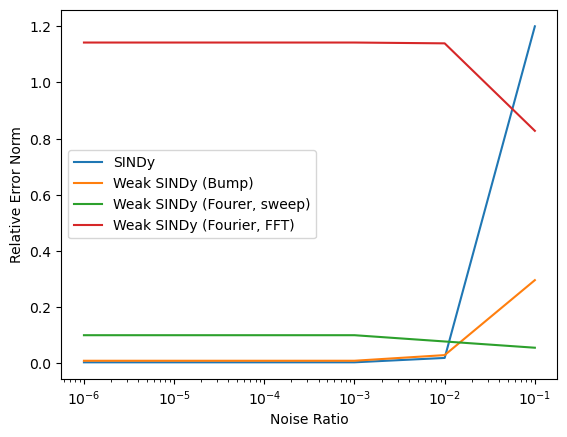

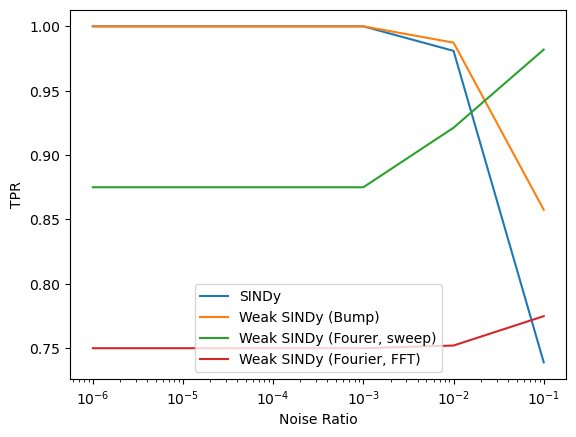

In [7]:
# error plot
plt.figure()
plt.semilogx(arr_sig_NR,error_SINDy)
plt.semilogx(arr_sig_NR,error_WSINDy_bump)
plt.semilogx(arr_sig_NR,error_WSINDy_Fourier_sweep)
plt.semilogx(arr_sig_NR,error_WSINDy_Fourier_FFT)
plt.xlabel("Noise Ratio")
plt.ylabel("Relative Error Norm")
plt.legend(["SINDy","Weak SINDy (Bump)","Weak SINDy (Fourer, sweep)","Weak SINDy (Fourier, FFT)"])

# TPR plot
plt.figure()
plt.semilogx(arr_sig_NR,TPR_SINDy)
plt.semilogx(arr_sig_NR,TPR_WSINDy_bump)
plt.semilogx(arr_sig_NR,TPR_WSINDy_Fourier_sweep)
plt.semilogx(arr_sig_NR,TPR_WSINDy_Fourier_FFT)
plt.xlabel("Noise Ratio")
plt.ylabel("TPR")
plt.legend(["SINDy","Weak SINDy (Bump)","Weak SINDy (Fourer, sweep)","Weak SINDy (Fourier, FFT)"])